In [3]:
import gym
import numpy as np

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2
from stable_baselines import PPO1
# from particle_env import PrticleEnv
from particle_env_continuous_closer import PrticleEnv

import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s" % (info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())






In [19]:
# env = DummyVecEnv([lambda: PrticleEnv(alpha,win_thre)])
args = {"alpha"=1,"beta"=1000,"win_thre"=1, "max_timestep"=256}
env = DummyVecEnv([lambda: PrticleEnv(**args)])




model = PPO1(MlpPolicy,env,verbose=0,\
        timesteps_per_actorbatch=256,
        policy_kwargs={"net_arch": [dict(vf=[64,64,64], pi=[64,64,64])]},\
        optim_stepsize = 3e-4,
        optim_batchsize=256,
        optim_epochs = 4,
        schedule='linear',
        n_cpu_tf_sess=16)
model.learn(total_timesteps=int(1e4))



SyntaxError: invalid syntax (<ipython-input-19-249dea1ed381>, line 2)

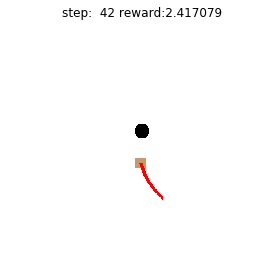

In [ ]:
env = PrticleEnv(alpha=1,beta=100,win_thre=1, max_timestep=256)
model = PPO1.load("model/ppo1_continuous_closer_exp1_010M.zip")
# Enjoy trained agent
dones = True
# for _ in range(1000):
while True:
    if dones:
        obs = env.reset()
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
#     obs, rewards, dones, info = env.step(env.action_space.sample()/10+5)
    obs = np.round(obs,2)
    show_state(env,info="step:%4d reward:%f" %(env.curr_timestep,rewards))

env.close()

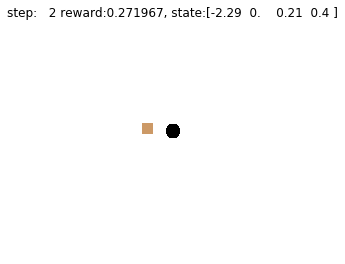

In [ ]:
import numpy as np
import gym

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2
from stable_baselines import PPO1
from particle_env import PrticleEnv

import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
#     plt.title("%s | Step: %d %s" % (env.spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())


def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s" % (info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

# Enjoy trained agent
dones = True
# for _ in range(1000):
env = PrticleEnv(alpha=1,win_thre=1,max_timestep=64)

while True:
    if dones:
        obs = env.reset()

    obs, rewards, dones, info = env.step(env.action_space.sample())
    obs = np.round(obs,2)
    show_state(env,info="step:%4d reward:%f, state:%s" %(env.curr_timestep,rewards,np.array2string(obs)))
env.close()